# Exercise 1 - Python

### Simple Linear Regression

**Part One:** Predicting restaurant profits with one predictor

Beginning with package imports, data loading, and initial visualization

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [19]:
path = 'C:/Users/JeffM/Documents/Projects/Machine Learning/machine-learning-ex1/ex1/'
dfRest = pd.read_csv(path + 'ex1data1.txt', header=None, names=['Population','Profit'])

dfRest.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


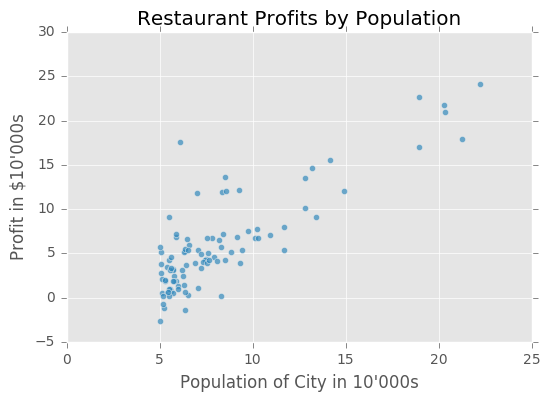

In [20]:
dfRest.plot.scatter(x='Population', y='Profit', alpha=0.7,
                    title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

### Cost Function

**Hypothesis**: $h_\theta(x) = \theta_0 + \theta_1x_1$

- Notation:

    - $\theta_0$: Intercept

    - $\theta_1$: Coefficient of the regressor.  Statisticians will often write this as $\beta_1$

**Cost Function**: $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

- Notation:

    - $m$: Number of records

    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)

In [21]:
# Adding a column of 1s to better handle theta_0
dfRest['Intercept'] = 1

# Creating arrays out of the predictors and response variables
X = dfRest[['Intercept', 'Population']]
y = dfRest['Profit']

def cost_function(X, y, theta=[[0],[0]]):
    """Calculates the squared error"""
    m = y.size
    h = X.dot(theta)  # Dot product multiplication
    squaredError = np.sum((h.subtract(y, axis=0))**2)[0]
    return (1/(2*m))*squaredError

cost_function(X, y)

32.072733877455654

Showing the cost function of a few values of $\theta_1$ in a plot

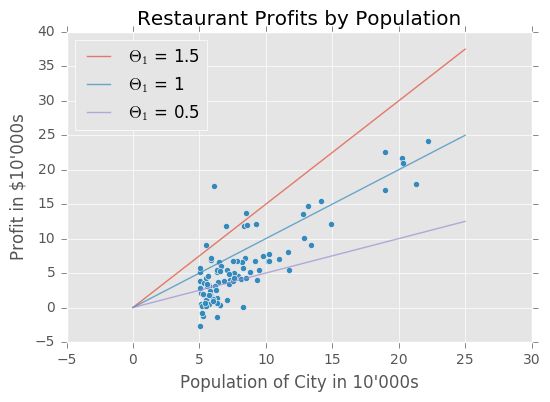

Theta_1 1.5: 25.6588949339
Theta_1 1: 7.44585554293
Theta_1 0.5: 9.58380185744


In [22]:
ax = dfRest.plot.scatter(x='Population', y='Profit',
                         title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

plt.plot([x*1.5 for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 1.5', alpha=0.7)
plt.plot([x for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 1', alpha=0.7)
plt.plot([x*0.5 for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 0.5', alpha=0.7)

ax.legend(loc=2)

plt.show()

print('Theta_1 1.5:', cost_function(X, y, theta=[[0],[1.5]]))
print('Theta_1 1:', cost_function(X, y, theta=[[0],[1]]))
print('Theta_1 0.5:', cost_function(X, y, theta=[[0],[0.5]]))

### Gradient Descent

Repeat until convergence:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)}$

- Notation:

    - $\theta_0$: Intercept

    - $\theta_1$: Coefficient of the regressor.  Statisticians will write this as $\beta_1$

    - $m$: Number of records

    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)
    
    - $\alpha$: Learning rate (e.g. size of step for gradient descent to take at each iteration)

In [23]:
def gradient_descent(X, y, alpha, iterations):
    """
    Batch gradient descent
    Calculates and stores the cost at each iteration for plotting
    """
    costIteration = []  # For storing the cost function at each iteration
    theta = [[0] for x in np.zeros(X.shape[1])]  # Initializing thetas with 0s
    m = y.size
    
    for i in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(np.dot(X.values.T, (h.subtract(y, axis=0))))
        costIteration.append(cost_function(X, y, theta))
    return(theta, costIteration)

# Setting parameters per exercise instructions
alpha = 0.01
iterations = 1500

# Running on the data and showing the values of theta
pt1GradientDescent = gradient_descent(X, y, alpha=alpha, iterations=iterations)
pt1Theta = pt1GradientDescent[0].ravel()
print('Theta_0:', pt1Theta[0])
print('Theta_1:', pt1Theta[1])

Theta_0: -3.6302914394
Theta_1: 1.16636235034


Displaying predictions on top of the data

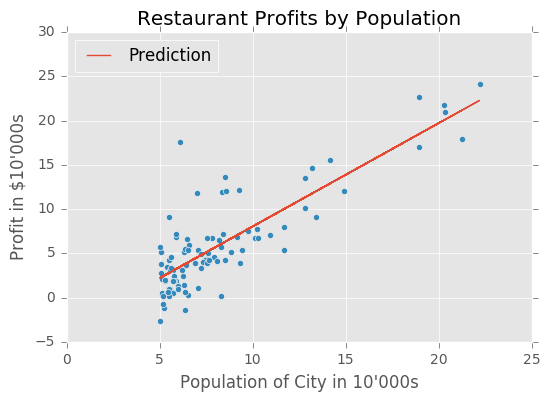

In [24]:
# Generating the predictions using our acquired values of theta
dfRest['Prediction'] = pt1Theta[0] + dfRest['Population']*pt1Theta[1]

ax = dfRest.plot.scatter(x='Population', y='Profit',
                         title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

ax.plot(dfRest['Population'], dfRest['Prediction'], label='Prediction')

ax.legend(loc=2)

#### 2.4 Visualizing $J(\theta)$

---

### Linear regression with multiple variables

**Part 2:** Predicting housing prices profits with two predictors

In [25]:
dfHouse = pd.read_csv(path+'ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

dfHouse.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


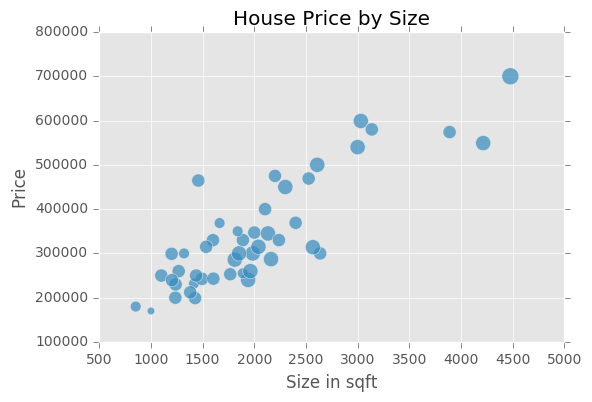

In [26]:
dfHouse.plot.scatter(x='Size', y='Price',
                     alpha=0.7, s=dfHouse['Bedrooms']*30,  # Multiplying to scale up point size
                     title='House Price by Size')

plt.xlabel("Size in sqft")

#### Feature normalization

Normalizing the features with standardization due to house size being significantly larger than the number of bedrooms.  This will play nicer with our gradient descent function.

Standardization: $x' = \frac{x - \bar{x}}{\sigma}$

In [27]:
def standard_scaler(x):
    xScaled = (x - x.mean()) / x.std()
    return(xScaled)

dfHouse_scaled = dfHouse.apply(standard_scaler)

In [28]:
# Adding a column of 1s to better handle theta_0
dfHouse_scaled['Intercept'] = 1

# Creating arrays out of the predictors and response variables
X = dfHouse_scaled[['Intercept', 'Size', 'Bedrooms']]
y = dfHouse_scaled['Price']

X.head()

,Intercept,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [29]:
cost_function(X,y,[[0],[0],[0]])

0.4893617021276595

In [30]:
pt2GradientDescent = gradient_descent(X, y, alpha=alpha, iterations=iterations)
pt2Theta = pt2GradientDescent[0].ravel()
print('Theta_0:', pt2Theta[0])
print('Theta_1:', pt2Theta[1])
print('Theta_2:', pt2Theta[2])

Theta_0: -9.9270473638e-17
Theta_1: 0.884042348978
Theta_2: -0.0524551808647


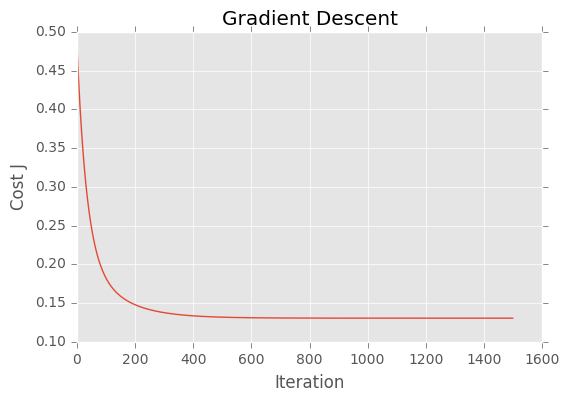

In [31]:
plt.plot(pt2GradientDescent[1])
plt.title('Gradient Descent')
plt.ylabel('Cost J')
plt.xlabel('Iteration')

Displaying predictions on top of the data

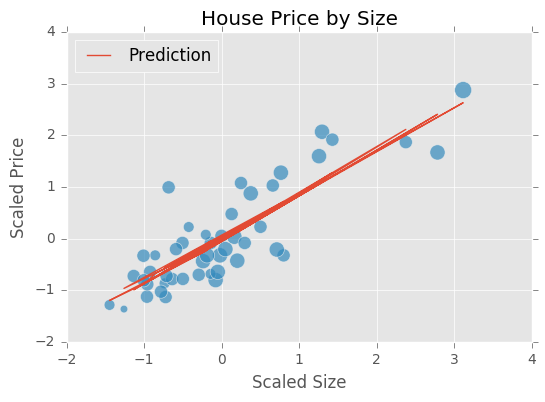

In [32]:
# Generating the predictions using our acquired values of theta
dfHouse_scaled['Prediction'] = pt2Theta[0] + \
                               dfHouse_scaled['Size']*pt2Theta[1] + \
                               dfHouse_scaled['Bedrooms']*pt2Theta[2]

ax = dfHouse_scaled.plot.scatter(x='Size', y='Price',
                     alpha=0.7, s=dfHouse['Bedrooms']*30,  # Multiplying to scale up point size
                     title='House Price by Size')

plt.xlabel("Scaled Size")
plt.ylabel("Scaled Price")

ax.plot(dfHouse_scaled['Size'], dfHouse_scaled['Prediction'], label='Prediction')

ax.legend(loc=2)